In [1]:
!pip install librosa
!pip install numpy
!pip install pandas
!pip install scikit-learn


In [2]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()

zip_file_name = list(uploaded.keys())[0]
print(f"Uploaded zip file: {zip_file_name}")


Saving speech-emotion-recognition-ravdess-data.zip to speech-emotion-recognition-ravdess-data.zip
Uploaded zip file: speech-emotion-recognition-ravdess-data.zip


In [10]:
extract_dir = '/content/dataset/'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to /content/dataset/


In [11]:
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        print(f"Found file: {file}")


Found file: 03-01-04-01-01-01-15.wav
Found file: 03-01-08-02-02-02-15.wav
Found file: 03-01-05-01-01-02-15.wav
Found file: 03-01-07-02-02-02-15.wav
Found file: 03-01-01-01-02-02-15.wav
Found file: 03-01-08-01-02-02-15.wav
Found file: 03-01-07-01-02-02-15.wav
Found file: 03-01-08-02-02-01-15.wav
Found file: 03-01-06-01-02-02-15.wav
Found file: 03-01-08-01-01-02-15.wav
Found file: 03-01-08-01-01-01-15.wav
Found file: 03-01-02-01-01-02-15.wav
Found file: 03-01-06-02-01-01-15.wav
Found file: 03-01-02-02-01-02-15.wav
Found file: 03-01-05-02-02-01-15.wav
Found file: 03-01-08-01-02-01-15.wav
Found file: 03-01-04-01-01-02-15.wav
Found file: 03-01-03-01-02-02-15.wav
Found file: 03-01-04-02-02-02-15.wav
Found file: 03-01-05-01-02-02-15.wav
Found file: 03-01-03-02-02-01-15.wav
Found file: 03-01-08-02-01-01-15.wav
Found file: 03-01-07-02-02-01-15.wav
Found file: 03-01-01-01-02-01-15.wav
Found file: 03-01-05-02-01-02-15.wav
Found file: 03-01-04-02-02-01-15.wav
Found file: 03-01-07-02-01-01-15.wav
F

In [12]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [13]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

observed_emotions = ['calm', 'happy', 'fearful', 'disgust']


In [14]:
import numpy as np
import pandas as pd
import librosa
import os

def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name, sr=None)
    features = np.array([])

    if mfcc:
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        features = np.hstack((features, mfccs_mean))

    if chroma:
        stft = np.abs(librosa.stft(X))
        chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma_stft.T, axis=0)
        features = np.hstack((features, chroma_mean))

    if mel:
        mel_spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        mel_mean = np.mean(mel_spectrogram.T, axis=0)
        features = np.hstack((features, mel_mean))

    return features

def load_data(directory, emotions, observed_emotions, test_size=0.25):
    features = []
    labels = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                label_code = file.split('-')[2]
                label = emotions.get(label_code, None)
                if label and label in observed_emotions:
                    features.append(extract_feature(file_path))
                    labels.append(label)

    features = np.array(features)
    labels = np.array(labels)

    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)

    return x_train, x_test, y_train, y_test

emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

observed_emotions = ['calm', 'happy', 'fearful', 'disgust']

extract_dir = '/content/dataset/'

x_train, x_test, y_train, y_test = load_data(extract_dir, emotions, observed_emotions, test_size=0.25)

print(f"Shape of training data: {x_train.shape}")
print(f"Shape of testing data: {x_test.shape}")

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size=32, max_iter=500)

print("Training the model...")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Shape of training data: (576, 180)
Shape of testing data: (192, 180)
Training the model...
Test Accuracy: 70.83%


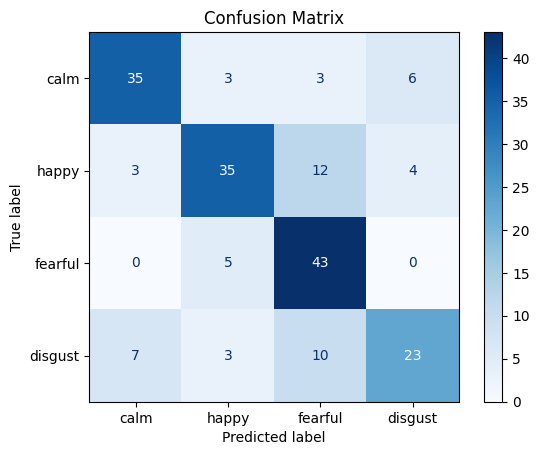

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=observed_emotions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=observed_emotions)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix')
plt.show()

Emotion Model Test Accuracy: 77.08%


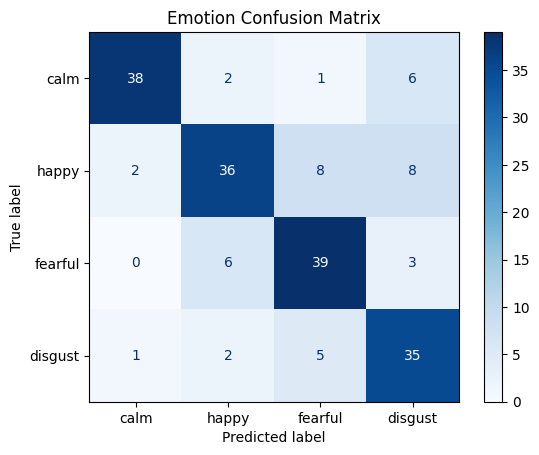

Gender Model Test Accuracy: 96.88%


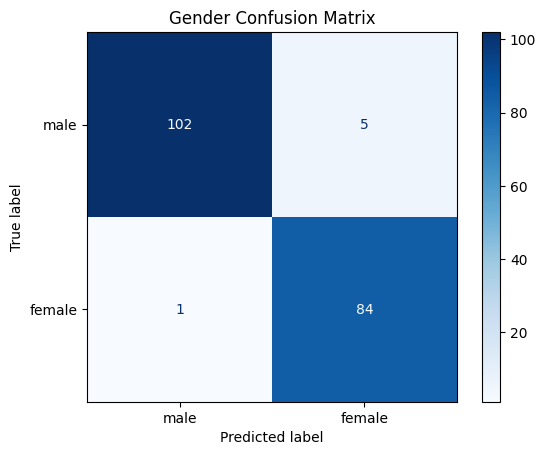

In [16]:
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

observed_emotions = ['calm', 'happy', 'fearful', 'disgust']
observed_genders = ['male', 'female']

def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name, sr=None)
    features = np.array([])

    if mfcc:
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        features = np.hstack((features, mfccs_mean))

    if chroma:
        stft = np.abs(librosa.stft(X))
        chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        chroma_mean = np.mean(chroma_stft.T, axis=0)
        features = np.hstack((features, chroma_mean))

    if mel:
        mel_spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        mel_mean = np.mean(mel_spectrogram.T, axis=0)
        features = np.hstack((features, mel_mean))

    return features

def load_data_with_gender(directory, emotions, genders, observed_emotions, observed_genders, test_size=0.25):
    features = []
    emotion_labels = []
    gender_labels = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                last_identifier = int(file.split('-')[-1].split('.')[0])  # Get the last part and convert to integer
                gender_label = 'male' if last_identifier % 2 != 0 else 'female'
                emotion_code = file.split('-')[2]  # Assuming emotion code is at index 2

                emotion_label = emotions.get(emotion_code, None)

                if (gender_label in observed_genders) and (emotion_label in observed_emotions):
                    features.append(extract_feature(file_path))
                    emotion_labels.append(emotion_label)
                    gender_labels.append(gender_label)

    features = np.array(features)
    emotion_labels = np.array(emotion_labels)
    gender_labels = np.array(gender_labels)

    x_train_emotion, x_test_emotion, y_train_emotion, y_test_emotion = train_test_split(
        features, emotion_labels, test_size=test_size, random_state=42
    )
    x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(
        features, gender_labels, test_size=test_size, random_state=42
    )

    return x_train_emotion, x_test_emotion, y_train_emotion, y_test_emotion, x_train_gender, x_test_gender, y_train_gender, y_test_gender


extract_dir = '/content/dataset/'
x_train_emotion, x_test_emotion, y_train_emotion, y_test_emotion, x_train_gender, x_test_gender, y_train_gender, y_test_gender = load_data_with_gender(
    extract_dir, emotions, observed_genders, observed_emotions, observed_genders, test_size=0.25
)

emotion_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size=32, max_iter=500)
emotion_model.fit(x_train_emotion, y_train_emotion)

y_pred_emotion = emotion_model.predict(x_test_emotion)
emotion_accuracy = accuracy_score(y_test_emotion, y_pred_emotion)
print(f"Emotion Model Test Accuracy: {emotion_accuracy * 100:.2f}%")

cm_emotion = confusion_matrix(y_test_emotion, y_pred_emotion, labels=observed_emotions)
disp_emotion = ConfusionMatrixDisplay(confusion_matrix=cm_emotion, display_labels=observed_emotions)
disp_emotion.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Emotion Confusion Matrix')
plt.show()

gender_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size=32, max_iter=500)
gender_model.fit(x_train_gender, y_train_gender)

y_pred_gender = gender_model.predict(x_test_gender)
gender_accuracy = accuracy_score(y_test_gender, y_pred_gender)
print(f"Gender Model Test Accuracy: {gender_accuracy * 100:.2f}%")

cm_gender = confusion_matrix(y_test_gender, y_pred_gender, labels=observed_genders)
disp_gender = ConfusionMatrixDisplay(confusion_matrix=cm_gender, display_labels=observed_genders)
disp_gender.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Gender Confusion Matrix')
plt.show()


In [26]:
joblib.dump(gender_model, 'gender_model.pkl')
joblib.dump(emotion_model, 'emotion_model.pkl')


['emotion_model.pkl']

In [28]:
gender_model = joblib.load('gender_model.pkl')
emotion_model = joblib.load('emotion_model.pkl')


In [30]:
import numpy as np
import librosa
import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import FileUpload


emotion_model = joblib.load("emotion_model.pkl")
gender_model = joblib.load("gender_model.pkl")

def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name, sr=None)
    features = np.array([])

    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        features = np.hstack((features, mfccs))

    if chroma:
        stft = np.abs(librosa.stft(X))
        chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        features = np.hstack((features, chroma_stft))

    if mel:
        mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        features = np.hstack((features, mel_spectrogram))

    return features

def predict_emotion_and_gender(file_path):
    features = extract_feature(file_path).reshape(1, -1)
    emotion_prediction = emotion_model.predict(features)[0]
    gender_prediction = gender_model.predict(features)[0]
    print(f"Predicted Emotion: {emotion_prediction}")
    print(f"Predicted Gender: {gender_prediction}")

uploader = FileUpload(accept='.wav', multiple=False)
predict_button = widgets.Button(description="Predict Emotion and Gender")
clear_button = widgets.Button(description="Clear File")

def on_predict_button_click(b):
    if uploader.value:
        uploaded_file = list(uploader.value.values())[0]
        file_name = "temp_audio.wav"
        with open(file_name, "wb") as f:
            f.write(uploaded_file['content'])
        predict_emotion_and_gender(file_name)

def on_clear_button_click(b):
    uploader.value.clear()
    uploader._counter = 0
    print("File cleared. You can upload a new file.")

predict_button.on_click(on_predict_button_click)
clear_button.on_click(on_clear_button_click)

display(uploader, predict_button, clear_button)


FileUpload(value={}, accept='.wav', description='Upload')

Button(description='Predict Emotion and Gender', style=ButtonStyle())

Button(description='Clear File', style=ButtonStyle())

Predicted Emotion: happy
Predicted Gender: female
File cleared. You can upload a new file.
Predicted Emotion: calm
Predicted Gender: male
File cleared. You can upload a new file.
Predicted Emotion: calm
Predicted Gender: male
